<a href="https://colab.research.google.com/github/CarlosLeandro09/DataAnalysisRadiology/blob/main/_Difus%C3%A3o_sint%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aba de importação de pacotes requeridos

In [ ]:
!pip install pydicom

import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tqdm import tqdm
import numpy as np
import seaborn
import seaborn as sns
import pydicom as dicom

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.interpolate import interp1d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.4 MB/s 


# Aba de carregamento da tarefa

In [ ]:
def dwi_sint(path_b1, path_b2, b, b1, b2):

  image1=dicom.dcmread(path_b1)
  image2=dicom.dcmread(path_b2)

  np_pixel_array1 = image1.pixel_array
  np_pixel_array2 = image2.pixel_array

  pixel_array = np.ndarray(shape=(np_pixel_array1.shape))
  for i in range(0,len(np_pixel_array1)):
    for j in range(0,len(np_pixel_array2)):
        x = np.array([b1,b2])
        y = np.array([int(np_pixel_array1[i,j]), int(np_pixel_array2[i,j])])

        y_interp = interp1d(x, y, fill_value='extrapolate')
        s_0 = y_interp(0)
        if s_0 > 0:
          ADC = (-1/b2)*np.log((np_pixel_array2[i,j])/(s_0))
          s_b = s_0*(np.exp(-b*ADC))
          pixel_array[i,j] = s_b
        else:
          pixel_array[i,j] = 0
  return pixel_array

In [ ]:
path_b1 = '/content/IM-0001-0015.dcm' #Defina o caminho da imagem com menor b (aquisição)
path_b2 = '/content/IM-0001-0045.dcm' #Defina o caminho da imagem com maior b (aquisição)

b1 = 50 #Informe o menor b (aquisição)
b2 = 800 #Informe o maior b (aquisição)
b = 1400 #Informe o b desejado

#Caso queira modificar o contraste e o brilho, altere estes parâmetros abaixo.
contraste = 1 #Aumenta o contraste
brilho = 1 #Não afeta muito a imagem

pixel_array = dwi_sint(path_b1, path_b2, b, b1, b2)

<ipython-input-3-2b4a1eaaae15>:18: RuntimeWarning: divide by zero encountered in log
  ADC = (-1/b2)*np.log((np_pixel_array2[i,j])/(s_0))


# Aba de visualização

<Figure size 432x288 with 0 Axes>

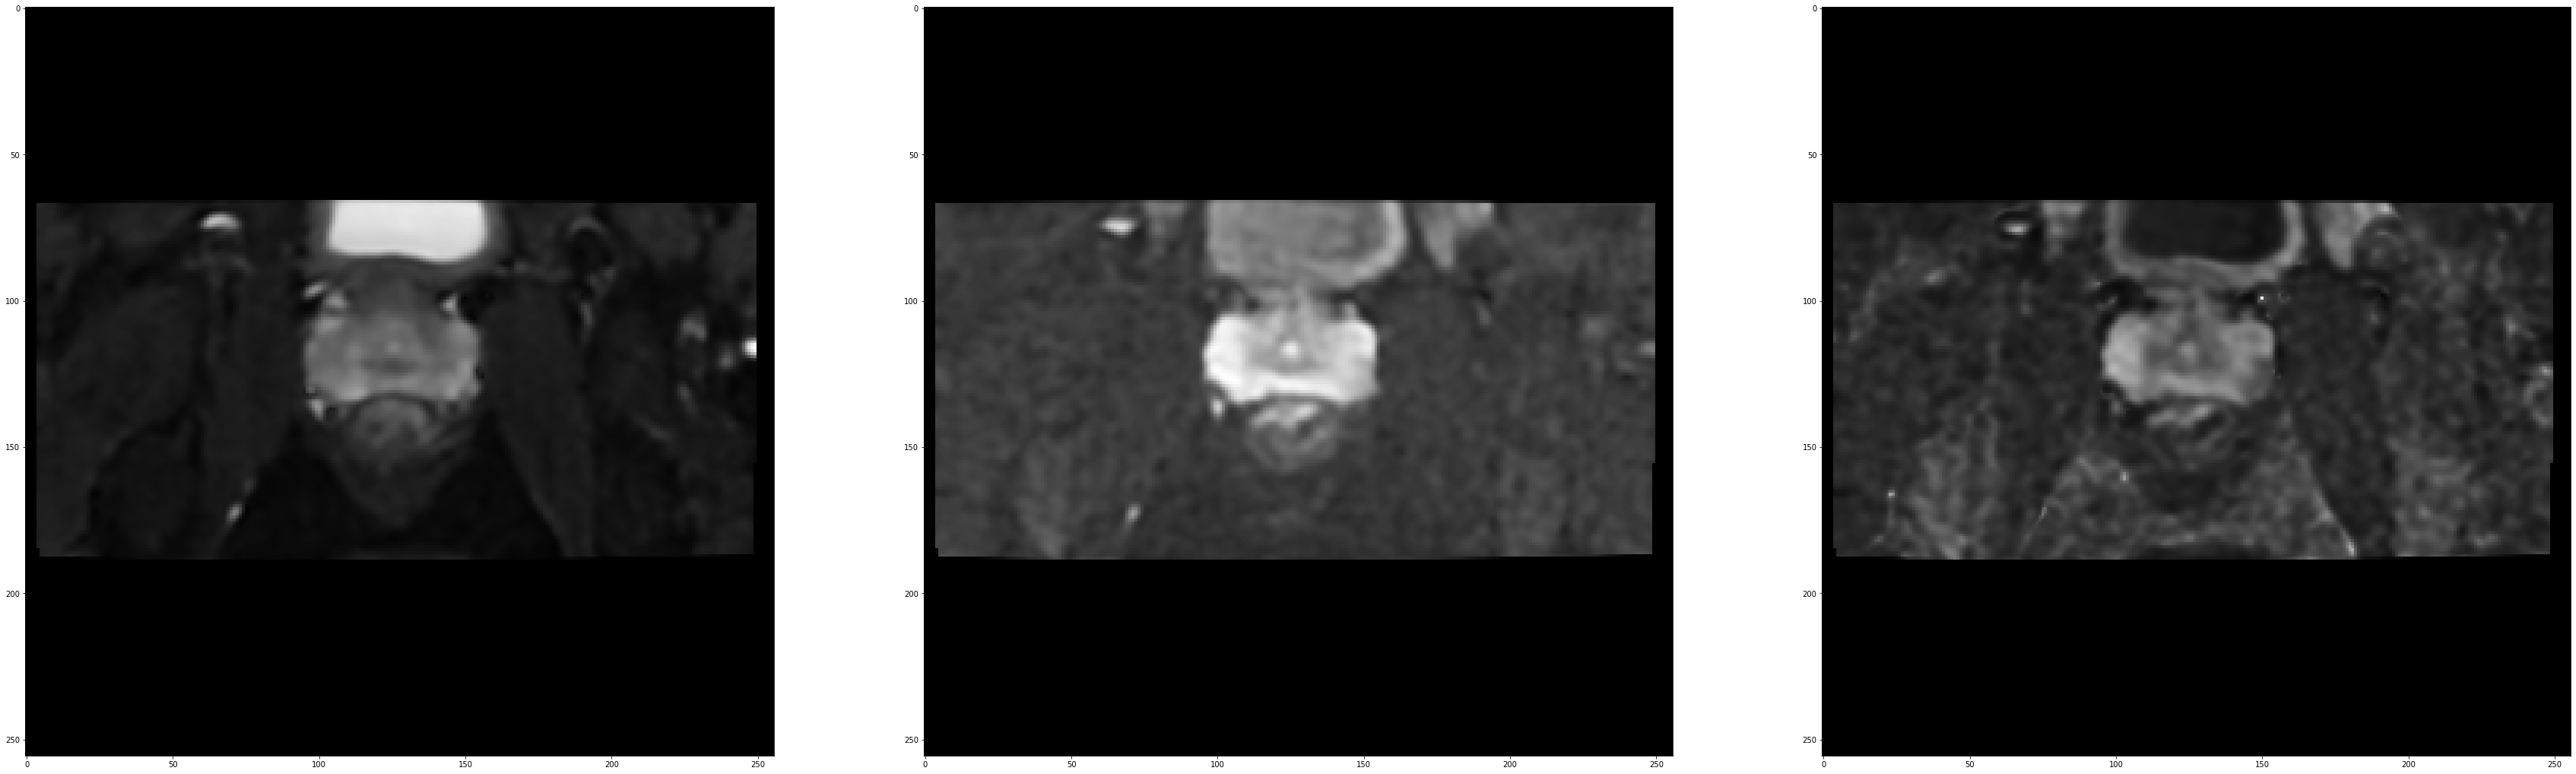

In [ ]:
plt.figure()
f, ax = plt.subplots(1, 3, figsize=(60,20))

image1=dicom.dcmread(path_b1)
image2=dicom.dcmread(path_b2)

np_pixel_array1 = image1.pixel_array
np_pixel_array2 = image2.pixel_array

plt.imsave('imagem1.png', np_pixel_array1, cmap='gray')
im1 = cv2.imread('./imagem1.png',1)
ax[0].imshow(im1)

plt.imsave('imagem2.png', np_pixel_array2, cmap='gray')
im2 = cv2.imread('./imagem2.png',1)
ax[1].imshow(im2)

pixel_array_new = np.ndarray(shape=(np_pixel_array1.shape))
for i in range(0,len(np_pixel_array1)):
  for j in range(0,len(np_pixel_array2)):
    pixel_array_new[i,j]=np.clip((contraste * pixel_array[i,j]) + brilho,pixel_array.min(),pixel_array.max())
plt.imsave('imagem_artigo.png', pixel_array_new, cmap='gray')
img = cv2.imread('./imagem_artigo.png',1)
ax[2].imshow(img, cmap = "gray")

plt.show()